# NAME: Haarish V
# REGISTER NO: 212223230067

In [125]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [126]:
# Read image
image = cv2.imread("CoinsA.png") 


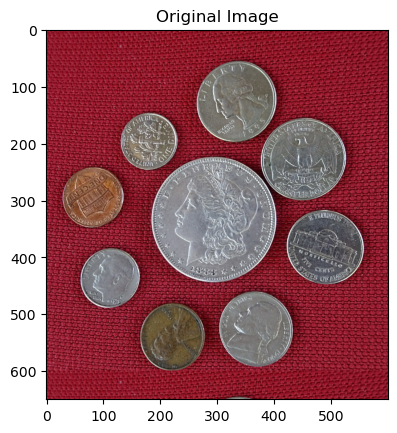

In [127]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()

In [128]:
# Convert image to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

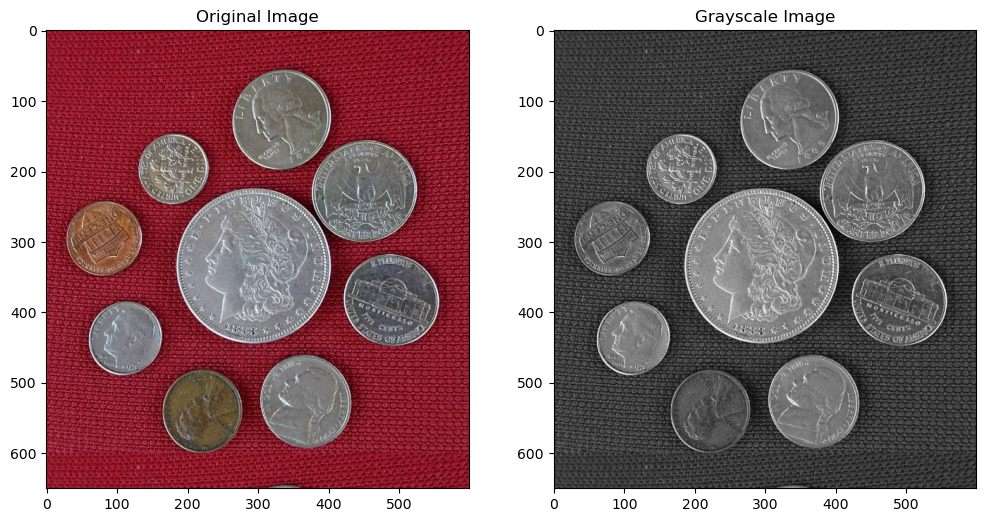

In [129]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()


In [130]:
# Split cell into channels
imageB, imageG, imageR = cv2.split(image)


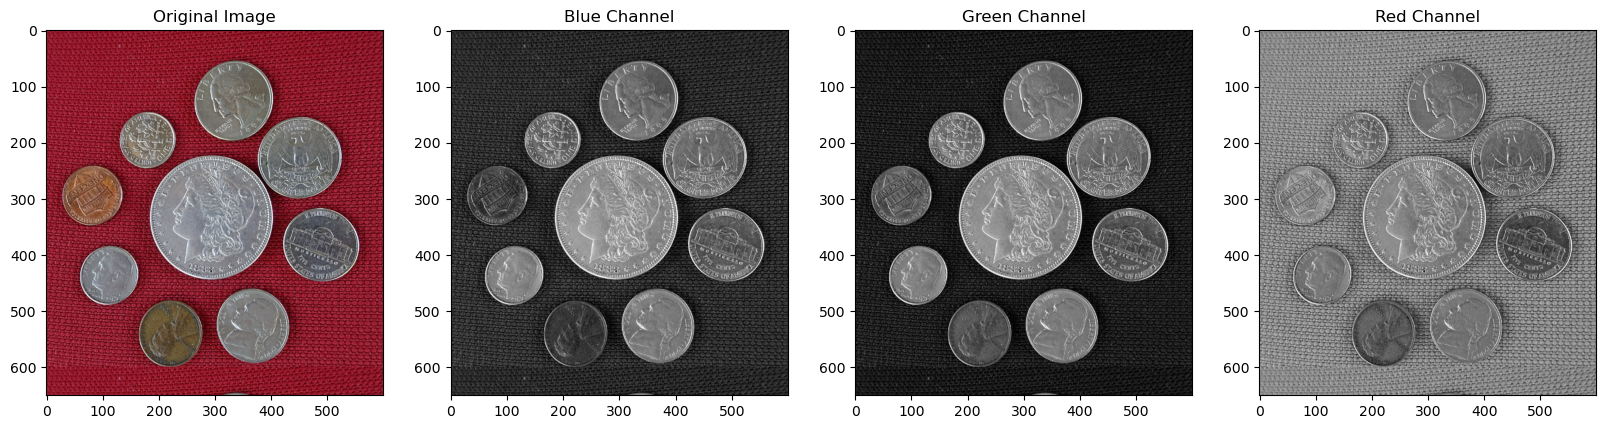

In [131]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()

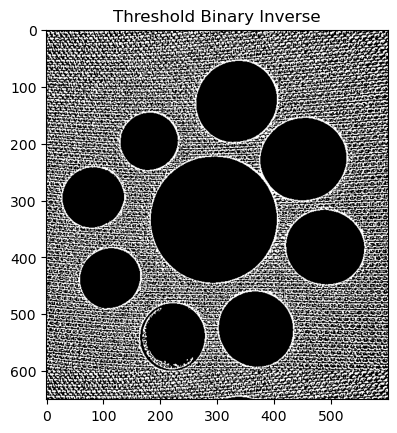

In [132]:
# Perform binary inverse thresholding
thresh_adapt = cv2.adaptiveThreshold(imageG, 255,
                                     cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV,
                                     11, 2)
blur = cv2.GaussianBlur(imageG, (7,7), 0)
_, coin_mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
coin_mask = cv2.morphologyEx(coin_mask, cv2.MORPH_CLOSE, kernel, iterations=3)

contours, _ = cv2.findContours(coin_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result = thresh_adapt.copy()
cv2.drawContours(result, contours, -1, 0, thickness=-1)  
# Display the thresholded inverse image

plt.imshow(result, cmap='gray')
plt.title("Threshold Binary Inverse")
plt.axis("on")
plt.show()



In [133]:
white_bg = np.ones_like(result) * 255
coins_mask = result == 0
white_bg[coins_mask] = 0
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
imageDilated2 = cv2.dilate(white_bg, kernel, iterations=2)


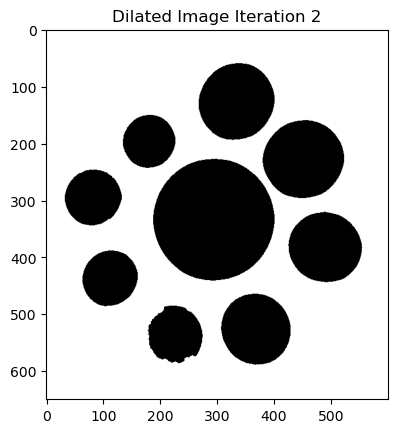

In [134]:
plt.imshow(imageDilated2, cmap='gray')
plt.title('Dilated Image Iteration 2')
plt.axis('on')
plt.show()

In [135]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.7

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.7

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.5

In [136]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

In [137]:
keypoints = detector.detect(imageDilated2)

In [138]:
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 9
